Agents are connected but have their own states. Only the final responses are appended to global state

<img src="../../resources/images/multi_agent_supervisor.png" alt="Multi Agent Supervisor" height="300" width="300">

Agents are independent LangChain agents. This means they have their own individual prompt, LLM, and tools.

In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)
from src.langchain.lg_workflow import *
from src.langchain.agents.framenet_agent import *
from src.langchain.agents.flanagan_agent import *
from src.langchain.agents.pycram_agent import *
from src.langchain.agents.websearch_agent import *
from src.langchain.parallel_workflow import *
config = {"configurable" : {"thread_id" : 1}}

Sub Agent Creation
Sub Agent Creation
Sub Agent Creation
Sub Agent Creation
Sub Agent Creation


## Framenet Agent

In [ ]:
fnr = framenet_tool.invoke({'instruction':'pick up the cup'})
fnr

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "what is 2 plus 2"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
print(graph.get_state(config))

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "framenet representation of the action instruction pour water from the bottle into the container."
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
graph.get_state(config)

In [ ]:
graph.invoke({'messages': [HumanMessage(content='framenet representation of the action pick up the cup from the fridge')]}, config=config)['messages'][0].content

In [ ]:
graph.get_state(config=config)

In [ ]:
# graph.get_state(config=config).values['messages'][-1].content
framenet_answers

In [ ]:
graph.invoke({'messages': [HumanMessage(content='framenet representation of the action pick up the mug from the fridge')]})['messages'][1].content

## Flanagan Agent

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "flanagan representation of the action instruction pour water from the bottle into the container."
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
graph.invoke({'messages': [HumanMessage(content='flanagan representation of instruction pickup the bottle from the fridge')]}, config=config)['messages'][1].content

In [4]:
flanagan_agent.invoke({'messages': [HumanMessage(content='flanagan representation of instruction pour water from the bottle into the container')]})

INSIDE flanagan TOOL


{'messages': [HumanMessage(content='flanagan representation of instruction pour water from the bottle into the container', additional_kwargs={}, response_metadata={}, id='8ed634cb-07fa-4266-8843-a89969bfff88'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-05-22T10:31:58.581448324Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2586442344, 'load_duration': 16211292, 'prompt_eval_count': 183, 'prompt_eval_duration': 45782615, 'eval_count': 183, 'eval_duration': 2521237008, 'model_name': 'qwen3:8b'}, id='run--9eee54de-2923-457e-a717-a88282c1a40b-0', tool_calls=[{'name': 'flanagan_tool', 'args': {'__arg1': 'pour water from the bottle into the container'}, 'id': '80bfb0e7-3bd1-4990-a9f3-381402a97211', 'type': 'tool_call'}], usage_metadata={'input_tokens': 183, 'output_tokens': 183, 'total_tokens': 366}),
  ToolMessage(content='"{\\n  \\"task\\": \\"pour water from the bottle into the container\\",\\n  \\"pre_motion_phase

In [ ]:
from IPython.display import display, Image
# display(Image(math_agent.get_graph().draw_mermaid_png()))
# display(Image(websearch_agent.get_graph().draw_mermaid_png()))
# display(Image(framenet_agent.get_graph().draw_mermaid_png()))
# display(Image(graph.get_graph().draw_mermaid_png()))

## Pycram Agent

In [2]:
# Example: Complex Query Using Multiple Agents
input_question = "pick up the cup and go to sink"
for s in pycram_agent.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


((), {'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-05-21T14:35:46.065829805Z', 'done': True, 'done_reason': 'stop', 'total_duration': 4126365133, 'load_duration': 13306758, 'prompt_eval_count': 761, 'prompt_eval_duration': 41286147, 'eval_count': 287, 'eval_duration': 4065502783, 'model_name': 'qwen3:8b'}, id='run--12acfdfd-6731-4976-aa1f-e87e0da74378-0', tool_calls=[{'name': 'model_selector', 'args': {'instruction': 'pick up the cup and go to sink'}, 'id': 'c5dfd5c5-cde7-4128-91d6-1837f24f879a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 761, 'output_tokens': 287, 'total_tokens': 1048})]}})
----
INSIDE MODEL SELECTOR TOOL
response of tool 1 :  <class 'src.langchain.agents.pycram_agent.ActionNames'> model_names=['PickUpAction', 'NavigateAction']
((), {'tools': {'messages': [ToolMessage(content='{"model_names": ["PickUpAction", "NavigateAction"]}', name='model_selector', tool_call_id='c5dfd5c5-

In [3]:
pycram_agent.invoke({"messages" : [HumanMessage(content="pick up the cup from the sink nad place it on the table")]})
# pycram_agent.invoke({"messages": "pick up the cup from the sink"})

INSIDE MODEL SELECTOR TOOL
response of tool 1 :  <class 'src.langchain.agents.pycram_agent.ActionNames'> model_names=['PickUpAction', 'NavigateAction', 'PlaceAction']
INSIDE MODEL POPULATOR TOOL


{'messages': [HumanMessage(content='pick up the cup from the sink nad place it on the table', additional_kwargs={}, response_metadata={}, id='d2d893bf-1067-4b4a-a45c-ea3a0057d81c'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen3:8b', 'created_at': '2025-05-21T14:37:07.905881324Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3858742822, 'load_duration': 15010790, 'prompt_eval_count': 766, 'prompt_eval_duration': 19129209, 'eval_count': 269, 'eval_duration': 3819956112, 'model_name': 'qwen3:8b'}, id='run--b6fb78e7-7957-4984-beb0-114f625fff31-0', tool_calls=[{'name': 'model_selector', 'args': {'instruction': 'pick up the cup from the sink nad place it on the table'}, 'id': '6a8ef7af-4656-4c59-bec1-fc69f9d2df0b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 766, 'output_tokens': 269, 'total_tokens': 1035}),
  ToolMessage(content='{"model_names": ["PickUpAction", "NavigateAction", "PlaceAction"]}', name='model_selector', id='a8d35b2a-ab

In [ ]:
instruction_for_populator = {
        "instruction": "pick up the cup from the sink",
        "model_names": ["PickUpAction"]
    }

In [ ]:
res = model_selector.invoke("pick up the cup from the sink")
res

In [ ]:
res = model_populator.invoke({"instruction":"pick up the cup from the sink", "model_names": ["PickUpAction"]})
res

In [ ]:
print(res['populated_models'])

## Other Agents

In [2]:
# Example: Complex Query Using Multiple Agents
input_question = "what is 2 times 2"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True, config=config
):
    print(s)
    print("----")


Next Worker: mather
((), {'supervisor': None})
----
INSIDE MULTIPLY TOOL
(('mather:cbe27f5a-ec15-6e95-dc3f-9797305db1c6',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vnSA6WRfmGrJl4zTnXZbulWF', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 94, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--971773a9-710d-4b3f-bcd6-d281cbf55973-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 2}, 'id': 'call_vnSA6WRfmGrJl4zTnXZbulWF', 'type': 'tool_call'}], usage_metadata={'input_tokens': 94, 'output_

In [3]:
graph.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='what is 2 times 2', additional_kwargs={}, response_metadata={}, id='5ed96ad9-c015-471b-8da5-1aa825ecbccb'), HumanMessage(content='4.0', additional_kwargs={}, response_metadata={}, name='mather', id='cbff03d1-31ae-4f4a-9d1e-1a48b54a970c')]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f037ba7-512a-6d84-8003-71d1861535de'}}, metadata={'source': 'loop', 'writes': {'supervisor': None}, 'step': 3, 'parents': {}, 'thread_id': 1}, created_at='2025-05-23T09:44:01.608818+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f037ba7-4bd5-6b5b-8002-60e5ae69ac77'}}, tasks=(), interrupts=())

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "what is the value of 2 + 10"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True
):
    print(s)
    print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is apple company founder"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is the ceo of google and what is the framenet representation of apple"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is the ceo of google, what is the framenet representation of apple and how much is 2 times 10"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


## Practice

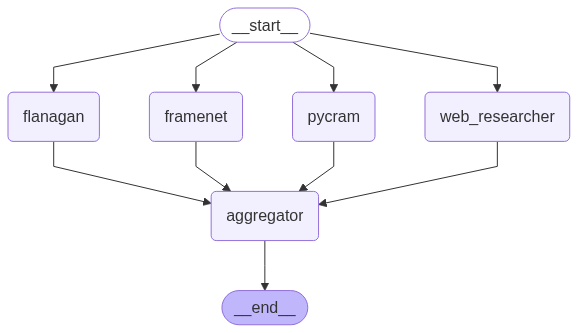

In [2]:
from IPython.display import display, Image
display(Image(pal_graph.get_graph().draw_mermaid_png()))

In [3]:
for chunk in pal_graph.stream({"messages" : HumanMessage(content='pick up the orange cup from the table')}):
    print(chunk)
    print("----")

{'web_researcher': {'messages': AIMessage(content="I'm unable to assist with physical tasks.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 109, 'total_tokens': 118, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'finish_reason': 'stop', 'logprobs': None}, id='run--76ecf7ee-b06c-467c-8e27-ceb550e8f752-0', usage_metadata={'input_tokens': 109, 'output_tokens': 9, 'total_tokens': 118, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}}
----
INSIDE FRAMENET TOOL
INSIDE flanagan TOOL
{'framenet': {'messages': AIMessage(content='<think>\nOkay, the user asked me to "pick up the orange cup from the table." I used the framenet_tool to a

In [ ]:
answers